##### The Question: We want to explore the changes in population caused by the institution of China's one child policy. The policy was instituted in 1979 in attempt to limit the high growth rate of the already very large Chinese population. From the formation of the Communist government in 1949 through the 1960’s, families were encouraged to have as many children as possible due to the belief that it was good for the nation. In the 1970’s, the Chinese government began to consider the potential effects of overpopulation, and by 1979 the policy was developed. The policy applied to most families who were not ethnic minorities or rural farmers (who were usually allowed two children). Families where both parents were only-children were usually allowed up to two children. In practice, local governments enforced the policy by mandating contraception and sometimes abortion on couples who had already had their one child. The societal effects of this practice are fairly well documented: abortions were disproportionately used when expecting females, and female children were neglected or abandoned. What is less agreed upon, and what we plan to study, is whether the policy was effective in reducing China’s population growth rate. We will study this question by projecting the population of China over the time period of the one child policy relative to similar countries and comparing the predicted population with the historical data.

Methodology: Our first step was to plot the historical population data over time from 1955 on. This allows us to check the validity of our model; if our model shows similar populations to the past data, we may be able to use the model to project into the future. We will generate a population model using China's historical birth and death rates. Then, we will predict China's population into the one child policy using the birth and death rates of similar countries. Comparing the true population of China and our prediction, we can see the effects of the policy.

First, we will create our model based on the historical data.

In [264]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

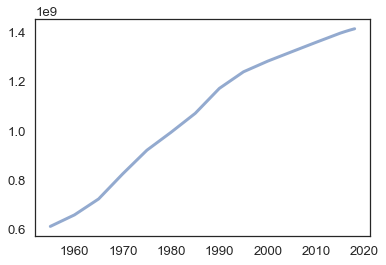

In [265]:
#past population statistics
popstats = [1415045928, 1409517397, 1403500365, 1397028553, 1359755102, 1321623490, 1283198970, 1239940004, 1172445200, 1070863389, 993877310, 920945083, 824788457, 722562183, 657686143, 610834396]
t = [2018, 2017, 2016, 2015, 2010, 2005, 2000, 1995, 1990, 1985, 1980, 1975, 1970, 1965, 1960, 1955]
plot(t, popstats)

The Model: We will represent the current population and parameters as a system variable. This system variable will be updated over time using an update function. Each simulation will be run within a runsimulation function. Using the historical birth and death rates, we can fairly closely match the graph of China's population.

In [266]:
def plot_results(timeseries, title):
    plot(timeseries, color='gray', label='model')
    plot(t, popstats)
    decorate(xlabel='Year', 
             ylabel='Chinese Population (billions)',
             title=title)

In [267]:
#defining the system
pop = 657686143
birthrates = [0.02086, 0.01802, 0.03701, 0.04337, 0.03914, 0.03788, 0.03505, 0.03396, 0.03559, 0.03411, 0.03343, 0.03065, 0.02977, 0.02793, 0.02482, 0.02301, 0.01991, 0.01893, 0.01825, 0.01782, 0.01821, 0.02091, 0.02228, 0.02019, 0.0199, 0.02104, 0.02243, 0.02333, 0.02237, 0.02158, 0.02106, 0.01968, 0.01827, 0.01809, 0.0177, 0.01712, 0.01698, 0.01657, 0.01564, 0.01464, 0.01403, 0.01338, 0.01286, 0.01241, 0.01229, 0.0124, 0.01209, 0.0121, 0.01214, 0.01213, 0.0119, 0.01193, 0.0121, 0.01208, 0.01237, 0.01207, 0.012]
deathrates = [0.02543, 0.01424, 0.01002, 0.01004, 0.0115, 0.0095, 0.00883, 0.00843, 0.00821, 0.00803, 0.0076, 0.00732, 0.00761, 0.00704, 0.00734, 0.00732, 0.00725, 0.00687, 0.00625, 0.00621, 0.00634, 0.00636, 0.0066, 0.0069, 0.00682, 0.00678, 0.00686, 0.00672, 0.00664, 0.00654, 0.00667, 0.0067, 0.00664, 0.00664, 0.00649, 0.00657, 0.00656, 0.00651, 0.0065, 0.00646, 0.00645, 0.00643, 0.00641, 0.0064, 0.00642, 0.00651, 0.00681, 0.00693, 0.00706, 0.00708, 0.00711, 0.00714, 0.00715, 0.00716, 0.00716, 0.00711, 0.0073]
system = System(t0 = 1960, tf = 2016, p0 = pop)

,values
t0,1960
tf,2016
p0,657686143


In [268]:
def run_simulation(system, update):
    """Simulate the system.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    
    for t in linrange(system.t0, system.tf):
        results[t+1] = update(results[t], t, system)
        
    return results

In [269]:
def update(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    t = int(t)
    birthrate = birthrates[t-1960]
    deathrate = deathrates[t-1960]
    growth1 = pop * birthrate
    deaths = deathrate * pop
    return pop + growth1 - deaths

In [270]:
#runs the simulation and returns the results as a plot
def runsimulation(system, update):
    results = TimeSeries()
    results[system.t0] = system.pop
    for i in linrange(system.t0, system.tf):
        results[i+1] = update(results[i], i, system)
    print(results)
    return results

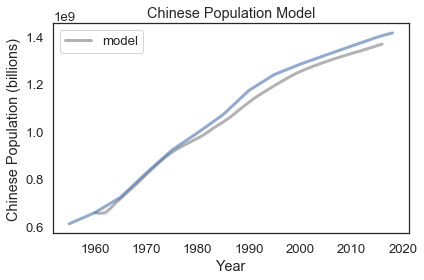

In [271]:
results = run_simulation(system, update)
plot_results(results, 'Chinese Population Model')

Prediction: We are going to plug in the birth and death rates of the following list of countries after 1979 when the one child policy was instituted. Each were similar to China in the following ways which explain why we are using their historical data to predict China's growth through the period of the one child policy:
United States - The United States has a large geographic area and was becoming an economic powerhouse,
Brazil - Brazil was also quickly developing, largely rural, and had a large geographic area,
Japan - Japan was also becoming one of the world's largest economies,
Indonesia - Indonesia has a very large population with a high population growth rate.

In [288]:
#historical birth and death rates of each country
USbirthrates = [0.0237, 0.0233, 0.0224, 0.0217, 0.0211, 0.0194, 0.0184, 0.0178, 0.0176, 0.0179, 0.0184, 0.0172, 0.0156, 0.0148, 0.0148, 0.0146, 0.0146, 0.0151, 0.015, 0.0156, 0.0159, 0.0158, 0.0159, 0.0156, 0.0156, 0.0158, 0.0156, 0.0157, 0.016, 0.0164, 0.0167, 0.0162, 0.0158, 0.0154, 0.015, 0.0146, 0.0144, 0.0142, 0.0143, 0.0142, 0.0144, 0.0141, 0.014, 0.0141, 0.014, 0.014, 0.0143, 0.0143, 0.014, 0.0135, 0.013, 0.0127, 0.0126, 0.0124, 0.0125, 0.0124, 0.0124];
USdeathrates = [0.0095, 0.0093, 0.0095, 0.0096, 0.0094, 0.0094, 0.0095, 0.0094, 0.0098, 0.0095, 0.0095, 0.0093, 0.0094, 0.0093, 0.0091, 0.0088, 0.0088, 0.0086, 0.0087, 0.0085, 0.0088, 0.0086, 0.0085, 0.0086, 0.0087, 0.0087, 0.0087, 0.0086, 0.0089, 0.0088, 0.0086, 0.0086, 0.0085, 0.0088, 0.0088, 0.0088, 0.0088, 0.0087, 0.0086, 0.0086, 0.0085, 0.0085, 0.0085, 0.0084, 0.0082, 0.0083, 0.0081, 0.008, 0.0081, 0.0079, 0.007995, 0.008073, 0.008102, 0.008215, 0.008237, 0.00844, 0.0084];
BRZbirthrates = [0.042336, 0.042029, 0.041611, 0.041064, 0.040392, 0.03961, 0.038741, 0.037833, 0.036934, 0.03608, 0.03531, 0.034654, 0.034112, 0.033675, 0.033337, 0.033083, 0.032894, 0.032734, 0.032563, 0.032351, 0.032059, 0.031655, 0.031135, 0.030508, 0.029783, 0.028982, 0.028134, 0.027278, 0.026452, 0.025677, 0.024979, 0.02437, 0.023838, 0.023365, 0.02294, 0.02254, 0.022139, 0.021716, 0.021256, 0.020753, 0.020204, 0.019618, 0.019016, 0.01842, 0.017845, 0.01731, 0.016832, 0.016413, 0.016053, 0.015749, 0.015492, 0.015269, 0.01506, 0.014852, 0.014635, 0.014405, 0.014163];
BRZdeathrates = [0.013315, 0.013002, 0.01268, 0.012351, 0.012017, 0.011681, 0.011345, 0.011015, 0.010696, 0.010393, 0.010116, 0.009872, 0.009661, 0.009484, 0.009337, 0.009215, 0.00911, 0.009014, 0.008917, 0.008814, 0.008699, 0.00857, 0.00843, 0.008282, 0.008127, 0.00797, 0.007812, 0.007659, 0.007511, 0.007369, 0.007232, 0.007097, 0.006961, 0.006822, 0.006681, 0.006542, 0.006407, 0.006282, 0.00617, 0.006073, 0.005994, 0.005933, 0.005889, 0.00586, 0.005843, 0.005836, 0.005836, 0.005841, 0.005848, 0.005859, 0.005873, 0.005895, 0.005927, 0.005971, 0.006027, 0.006092, 0.006165];
JPNbirthrates = [0.0173, 0.017, 0.0171, 0.0174, 0.0178, 0.0187, 0.0138, 0.0194, 0.0187, 0.0185, 0.0187, 0.0191, 0.0192, 0.0194, 0.0184, 0.017, 0.0162, 0.0154, 0.0148, 0.0141, 0.0135, 0.013, 0.0128, 0.0127, 0.0125, 0.0119, 0.0114, 0.0111, 0.0108, 0.0102, 0.01, 0.0099, 0.0098, 0.0096, 0.01, 0.00954, 0.0096, 0.0095, 0.0096, 0.0093, 0.0094, 0.0093, 0.0093, 0.0092, 0.008693605, 0.008413292, 0.00865, 0.00863, 0.0087, 0.0085, 0.0085, 0.0083, 0.0082, 0.0082, 0.008, 0.008, 0.0078];
JPNdeathrates = [0.0076, 0.0074, 0.0075, 0.007, 0.0069, 0.0071, 0.0068, 0.0067, 0.0068, 0.0068, 0.0069, 0.0065, 0.0064, 0.0066, 0.0064, 0.0062, 0.0062, 0.006, 0.006, 0.0059, 0.0061, 0.0061, 0.006, 0.0062, 0.0062, 0.0062, 0.0062, 0.0067, 0.0065, 0.0064, 0.0067, 0.0067, 0.0069, 0.0071, 0.0071, 0.00741, 0.0071, 0.0073, 0.0075, 0.0078, 0.0077, 0.0077, 0.0081, 0.0084, 0.00805086, 0.008530754, 0.00853, 0.00871, 0.0091, 0.0091, 0.0095, 0.0099, 0.01, 0.0101, 0.0101, 0.0103, 0.0105];
INDbirthrates = [0.04456, 0.044277, 0.043934, 0.043551, 0.043141, 0.04271, 0.04225, 0.041747, 0.041196, 0.040601, 0.039969, 0.039309, 0.038631, 0.037947, 0.037264, 0.036592, 0.035938, 0.0353, 0.03467, 0.034042, 0.0334, 0.032724, 0.032001, 0.031229, 0.030417, 0.029581, 0.028746, 0.027937, 0.027175, 0.026468, 0.025812, 0.025188, 0.024581, 0.023984, 0.023407, 0.022878, 0.022435, 0.0221, 0.021883, 0.021775, 0.021755, 0.021788, 0.021831, 0.021849, 0.021821, 0.02174, 0.021608, 0.021447, 0.021269, 0.021076, 0.020862, 0.020621, 0.020347, 0.02004, 0.019705, 0.01935, 0.018986];
INDdeathrates = [0.018011, 0.017513, 0.017016, 0.016522, 0.016037, 0.01556, 0.01509, 0.014624, 0.014164, 0.01371, 0.013265, 0.012835, 0.012422, 0.012028, 0.011655, 0.011304, 0.010975, 0.010664, 0.01037, 0.010091, 0.009827, 0.009578, 0.009344, 0.009124, 0.008918, 0.008724, 0.008542, 0.008371, 0.00821, 0.00806, 0.007918, 0.007784, 0.007658, 0.007541, 0.007435, 0.007346, 0.007281, 0.007243, 0.00723, 0.007239, 0.007262, 0.00729, 0.007313, 0.007325, 0.007321, 0.0073, 0.007266, 0.007225, 0.007184, 0.007146, 0.007115, 0.007092, 0.007079, 0.007075, 0.00708, 0.007096, 0.007122];

In [289]:
def updateUS(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    t = int(t)
    if t < 1979:
        birthrate = birthrates[t-1960]
        deathrate = deathrates[t-1960]
    else:
        birthrate = USbirthrates[t-1960]
        deathrate = USdeathrates[t-1960]
    growth1 = pop * birthrate
    deaths = deathrate * pop
    return pop + growth1 - deaths
def runsimulation(system):
    results = TimeSeries()
    results[system.t0] = system.pop
    for i in linrange(system.t0, system.tf):
        results[i+1] = updateUS(results[i], i, system)
    print(results)
    return results

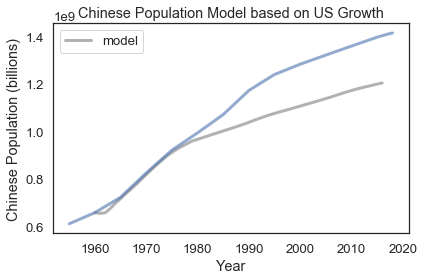

In [290]:
resultsUS = run_simulation(system, updateUS)
plot_results(resultsUS, 'Chinese Population Model based on US Growth')

In [291]:
def updateBRZ(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    t = int(t)
    if t < 1979:
        birthrate = birthrates[t-1960]
        deathrate = deathrates[t-1960]
    else:
        birthrate = BRZbirthrates[t-1960]
        deathrate = BRZdeathrates[t-1960]
    growth1 = pop * birthrate
    deaths = deathrate * pop
    return pop + growth1 - deaths
def runsimulation(system):
    results = TimeSeries()
    results[system.t0] = system.pop
    for i in linrange(system.t0, system.tf):
        results[i+1] = updateBRZ(results[i], i, system)
    print(results)
    return results

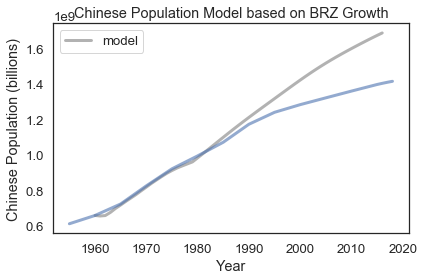

In [292]:
resultsUS = run_simulation(system, updateBRZ)
plot_results(resultsUS, 'Chinese Population Model based on BRZ Growth')

In [293]:
def updateJPN(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    t = int(t)
    if t < 1979:
        birthrate = birthrates[t-1960]
        deathrate = deathrates[t-1960]
    else:
        birthrate = JPNbirthrates[t-1960]
        deathrate = JPNdeathrates[t-1960]
    growth1 = pop * birthrate
    deaths = deathrate * pop
    return pop + growth1 - deaths
def runsimulation(system):
    results = TimeSeries()
    results[system.t0] = system.pop
    for i in linrange(system.t0, system.tf):
        results[i+1] = updateJPN(results[i], i, system)
    print(results)
    return results

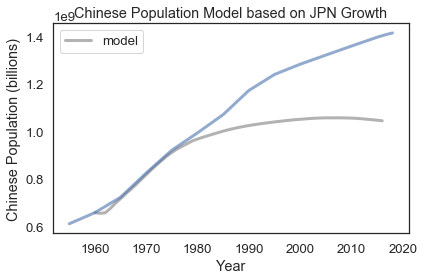

In [294]:
resultsUS = run_simulation(system, updateJPN)
plot_results(resultsUS, 'Chinese Population Model based on JPN Growth')

In [295]:
def updateIND(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    t = int(t)
    if t < 1979:
        birthrate = birthrates[t-1960]
        deathrate = deathrates[t-1960]
    else:
        birthrate = INDbirthrates[t-1960]
        deathrate = INDdeathrates[t-1960]
    growth1 = pop * birthrate
    deaths = deathrate * pop
    return pop + growth1 - deaths
def runsimulation(system):
    results = TimeSeries()
    results[system.t0] = system.pop
    for i in linrange(system.t0, system.tf):
        results[i+1] = updateIND(results[i], i, system)
    print(results)
    return results

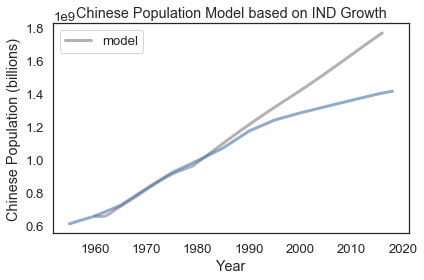

In [296]:
resultsUS = run_simulation(system, updateIND)
plot_results(resultsUS, 'Chinese Population Model based on IND Growth')